<a href="https://www.kaggle.com/code/dikabdullah/notebookbd6a4fee5b?scriptVersionId=197832897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [693]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer


# Uyarıları kapatma
warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.filterwarnings("ignore")

In [694]:
df_org=pd.read_excel("/kaggle/input/pusula-case/side_effect_data 1.xlsx")
df=df_org.copy()

# Ham Veri Seti Hakkında Detaylar

Ham Veri Setinin İlk 10 Satırı

In [695]:
df.head(10)

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0
5,131,Male,1982-01-05,Turkiye,NaN,fluoxetine dr,2022-01-07,2022-03-19,Agizda Farkli Bir Tat,2022-02-04 08:08:31,NaN,"Diyabet, Hipertansiyon",NaN,"Alzheimer, Kalp Hastaliklari",Kanser,"Diyabet, Kemik Erimesi",AB RH-,66.0,150.0
6,61,NaN,1997-01-10,Turkiye,Mersin,carbamazepine extended release,2022-01-05,2022-03-07,Agizda Farkli Bir Tat,2022-02-19 17:39:48,Bugday,"KOAH, Diyabet","Kalp Hastaliklari, Kan Hastaliklari",NaN,"Kan Hastaliklari, Hipertansiyon","KOAH, Kalp Hastaliklari",NaN,NaN,147.0
7,95,NaN,1997-01-15,Turkiye,Antalya,thiothixene,2022-01-10,2022-03-07,Deride Morarma,2022-02-09 20:53:54,Ispanak,"Astim, Diyabet","Alzheimer, Diyabet",KOAH,"Guatr, Kan Hastaliklari","Guatr, Kan Hastaliklari",B RH+,96.0,162.0
8,3,Female,1973-08-05,Turkiye,NaN,"asenapine tablet, sublingual",2022-01-08,2022-03-17,Bas Agrisi,2022-02-19 04:14:26,Laktoz,NaN,"Kan Hastaliklari, Diger","Kanser, Guatr","Alzheimer, Hipertansiyon","Kanser, Kalp Hastaliklari",0 RH-,91.0,NaN
9,53,NaN,1941-10-16,Turkiye,Adana,fluphenazine hcl elixir,2022-01-10,2022-03-13,Gormede Bulaniklik,2022-02-09 01:16:50,Elma,"Kemik Erimesi, KOAH",Hipertansiyon,"KOAH, Alzheimer","KOAH, Alzheimer","Astim, Kan Hastaliklari",0 RH-,107.0,156.0


In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Sayısal Değerlerin Betimsel İstatistiği

In [697]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Kullanici_id,2357.0,97.216801,1.0,47.0,97.0,146.0,196.0,57.0172
Dogum_Tarihi,2357,1974-11-25 04:06:12.677131936,1939-10-12 00:00:00,1959-02-05 00:00:00,1973-09-09 00:00:00,1992-03-24 00:00:00,2011-04-25 00:00:00,NaN
Ilac_Baslangic_Tarihi,2357,2022-01-07 10:47:36.173101312,2022-01-01 00:00:00,2022-01-04 00:00:00,2022-01-07 00:00:00,2022-01-11 00:00:00,2022-01-14 00:00:00,NaN
Ilac_Bitis_Tarihi,2357,2022-03-10 16:25:27.365294848,2022-03-02 00:00:00,2022-03-06 00:00:00,2022-03-11 00:00:00,2022-03-15 00:00:00,2022-03-19 00:00:00,NaN
Yan_Etki_Bildirim_Tarihi,2357,2022-02-10 17:09:30.742044928,2022-02-01 04:34:33,2022-02-04 05:29:20,2022-02-09 20:53:54,2022-02-17 07:08:01,2022-02-19 21:47:39,NaN
Kilo,2064.0,80.863857,50.0,65.0,83.0,96.0,110.0,18.635269
Boy,2243.0,174.638431,145.0,160.0,176.0,187.0,203.0,16.516552


Sayısal Olmayan Değerlerin Betimsel İstatistiği

In [698]:
df.select_dtypes('O').describe().T

,count,unique,top,freq
Cinsiyet,1579,2,Female,872
Uyruk,2357,1,Turkiye,2357
Il,2130,13,Adana,220
Ilac_Adi,2357,151,chlordiazepoxide-amitriptyline,29
Yan_Etki,2357,22,Agizda Farkli Bir Tat,229
Alerjilerim,1873,28,Domates,118
Kronik Hastaliklarim,1965,80,"Alzheimer, Diger",61
Baba Kronik Hastaliklari,2201,92,"Alzheimer, Diyabet",64
Anne Kronik Hastaliklari,2140,84,"Alzheimer, Astim",110
Kiz Kardes Kronik Hastaliklari,2260,85,,168


In [699]:
print("Kullanici Sayısı : " ,len(set(df['Kullanici_id'].values)))
print("Ilac_Adi Sayısı : " ,len(set(df['Ilac_Adi'].values)))
print("Yan_Etki Sayısı : " ,len(set(df['Yan_Etki'].values)))
print("Alerjilerim Sayısı : " ,len(set(df['Alerjilerim'].values)))
print("Kronik Hastaliklarim Sayısı : " ,len(set(df['Kronik Hastaliklarim'].values)))
print("Veri Büyüklüğü : " ,df.shape[0])
print("Sütun Büyüklüğü : " ,df.shape[1])

Kullanici Sayısı :  196
Ilac_Adi Sayısı :  151
Yan_Etki Sayısı :  22
Alerjilerim Sayısı :  29
Kronik Hastaliklarim Sayısı :  81
Veri Büyüklüğü :  2357
Sütun Büyüklüğü :  19


İlk başta belirli işlemler için yaş,Kullanım_Süresi (Gün) ve Yan_Etki_Tesir_Süresi (Gün)  sütununu ekliyorum.

In [700]:
df['Dogum_Tarihi'] = pd.to_datetime(df['Dogum_Tarihi'])
today=pd.to_datetime(dt.date.today())
df['Yaş'] = 2022 - df['Dogum_Tarihi'].dt.year

In [701]:
df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df['Ilac_Baslangic_Tarihi'])
df['Ilac_Bitis_Tarihi'] = pd.to_datetime(df['Ilac_Bitis_Tarihi'])
df['Kullanım_Süresi (Gün)'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days

In [702]:
df['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(df['Yan_Etki_Bildirim_Tarihi'])
df['Yan_Etki_Tesir_Süresi (Gün)'] = (df['Yan_Etki_Bildirim_Tarihi']- df['Ilac_Baslangic_Tarihi']).dt.days






Yan Etkilerin Dağılımı

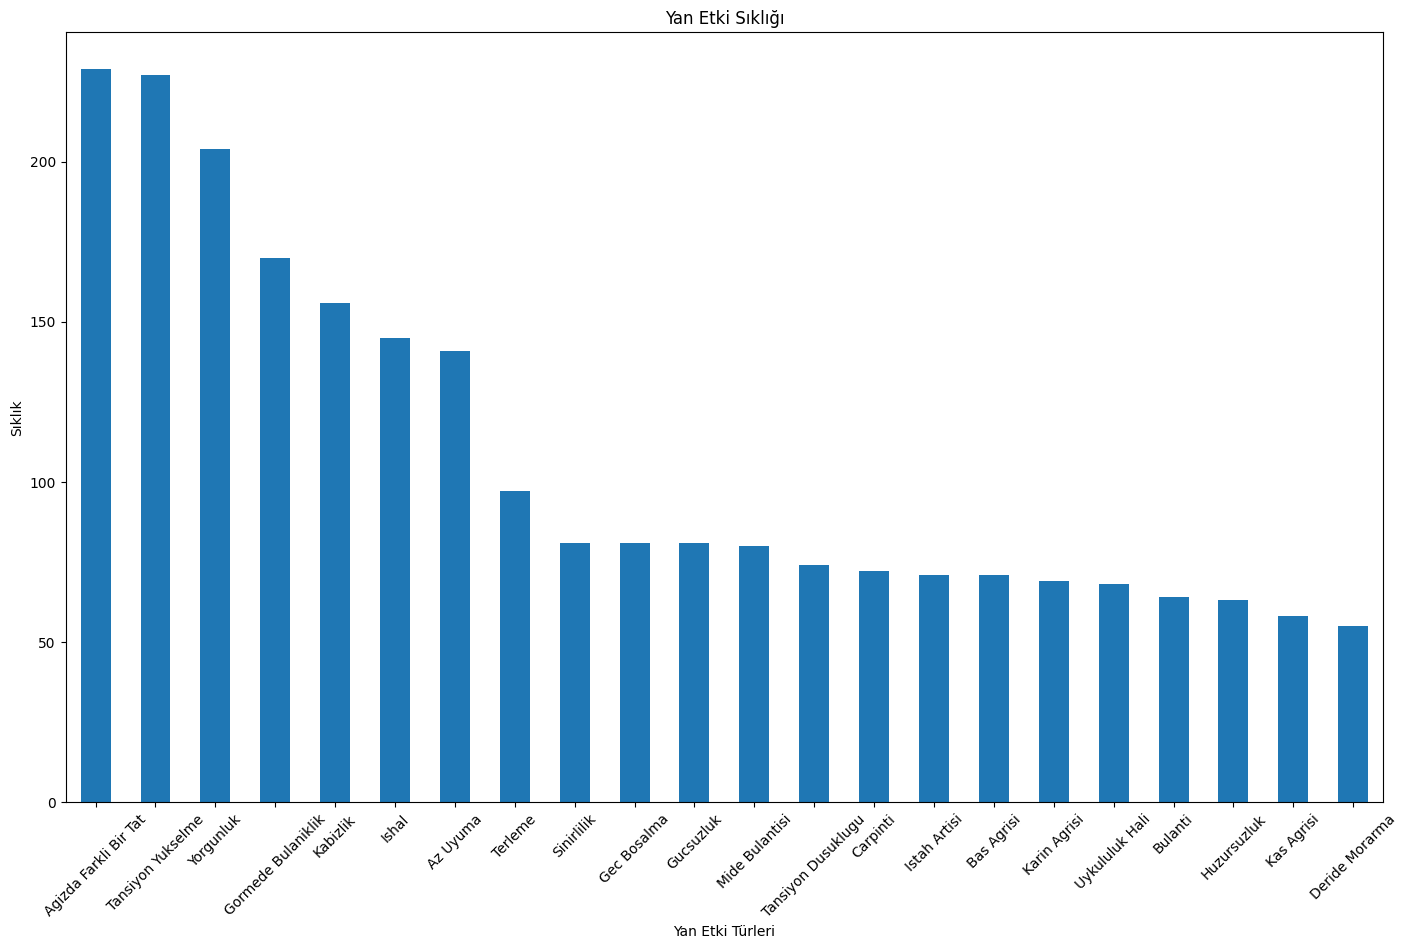

In [703]:
yan_etki_counts = df['Yan_Etki'].value_counts()
plt.figure(figsize=(17, 10))
yan_etki_counts.plot(kind='bar')
plt.title('Yan Etki Sıklığı')
plt.xlabel('Yan Etki Türleri')
plt.ylabel('Sıklık')
plt.xticks(rotation=45)
plt.show()

KDE Grafiğine baktığımızda normal dağılıma yakın bir görünümü var. Bu bizim için iyi bir şey.

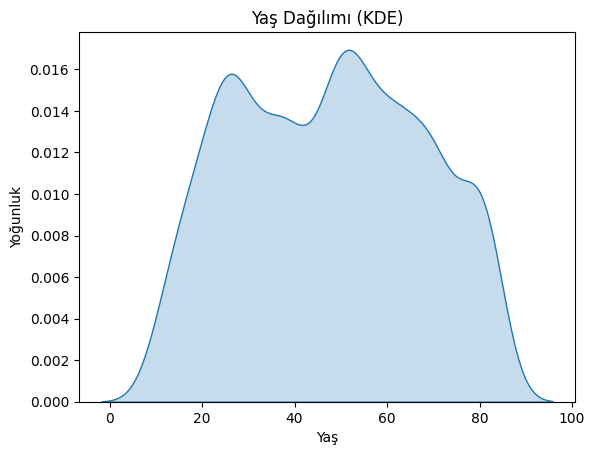

In [704]:
sns.kdeplot(df['Yaş'], shade=True)
plt.title('Yaş Dağılımı (KDE)')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.show()







Aynı Yaş grafiği gibi, Yan_Etki_Tesir_Süresi Sütununun KDE grafiği de normal dağılıma yakın.

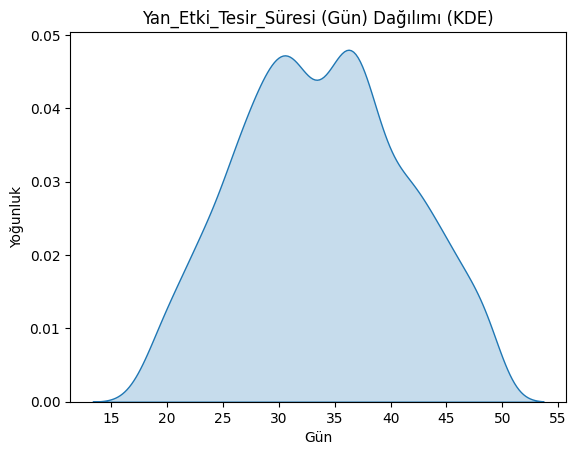

In [705]:
sns.kdeplot(df['Yan_Etki_Tesir_Süresi (Gün)'], shade=True)
plt.title('Yan_Etki_Tesir_Süresi (Gün) Dağılımı (KDE)')
plt.xlabel('Gün')
plt.ylabel('Yoğunluk')
plt.show()

Veri ham haldeyken cinsiyete göre kilo dağılımı bu şekilde.

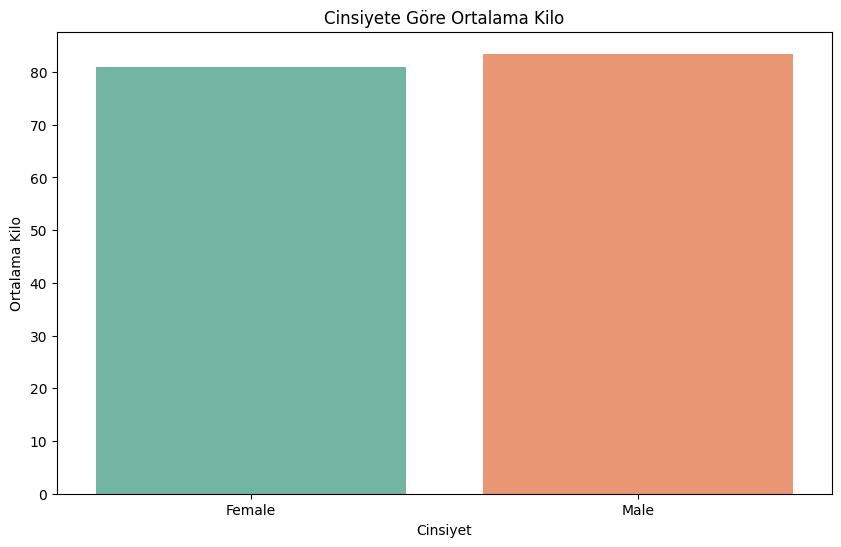

In [706]:
kilo_avg = df.groupby('Cinsiyet')['Kilo'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cinsiyet', y='Kilo', data=kilo_avg, palette='Set2')
plt.title('Cinsiyete Göre Ortalama Kilo')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Kilo')
plt.show()

Veri ham haldeyken cinsiyete göre boy dağılımı bu şekilde.

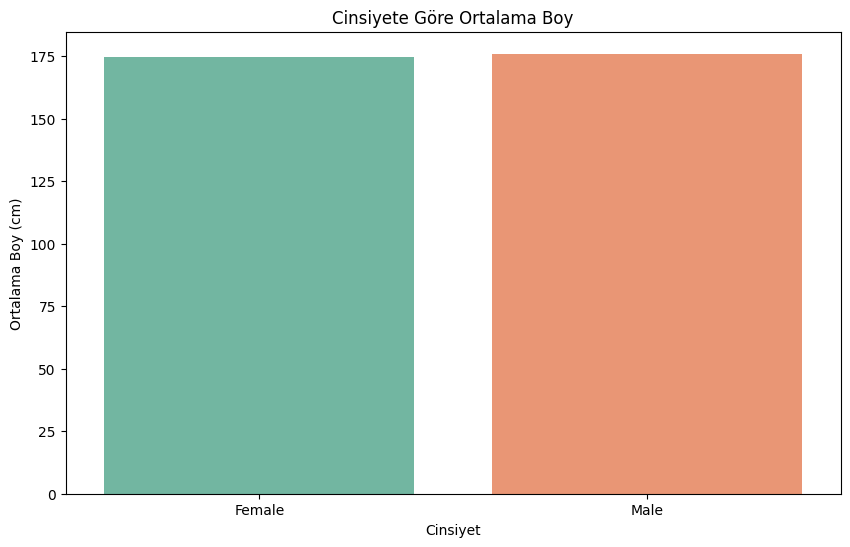

In [707]:
# Cinsiyete göre ortalama boyu hesapla
boy_avg = df.groupby('Cinsiyet')['Boy'].mean().reset_index()

# Barplot oluştur
plt.figure(figsize=(10, 6))
sns.barplot(x='Cinsiyet', y='Boy', data=boy_avg, palette='Set2')
plt.title('Cinsiyete Göre Ortalama Boy')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Boy (cm)')
plt.show()



# BOŞ DEĞERLERİ DOLDURMA

'Alerjilerim', 'Kronik Hastaliklarim', 'Anne Kronik Hastaliklari', 'Baba Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari' gibi sütunlarda ki boş değerleri 'Yok' şeklinde doldurmak, mantıklı olacaktır. Çünkü bu boş değerler hastanın bu durumları yaşamadığını belirtmek için kullanılabilir. Bu tarz bir yaklaşım verisetinin anlamlılığını korur ve analizlerde boş değerlerin yaşatacağı sorunları azaltır.

Bunun haricinde ise 'Il' ve 'Kan Grubu' bu gibi sütunlar hastanın kişisel ve sağlık bilgisi olduğundan herhangi bir şekilde doldurulamaz. Bu yüzden 'Bilinmiyor' ifadesiyle doldurma kararı aldım.

In [708]:
df.isna().sum().sort_values(ascending=False)

Cinsiyet                            778
Alerjilerim                         484
Kronik Hastaliklarim                392
Kan Grubu                           347
Kilo                                293
Il                                  227
Anne Kronik Hastaliklari            217
Baba Kronik Hastaliklari            156
Erkek Kardes Kronik Hastaliklari    121
Boy                                 114
Kiz Kardes Kronik Hastaliklari       97
Kullanım_Süresi (Gün)                 0
Yaş                                   0
Kullanici_id                          0
Yan_Etki_Bildirim_Tarihi              0
Yan_Etki                              0
Ilac_Bitis_Tarihi                     0
Ilac_Baslangic_Tarihi                 0
Ilac_Adi                              0
Uyruk                                 0
Dogum_Tarihi                          0
Yan_Etki_Tesir_Süresi (Gün)           0
dtype: int64

In [709]:
df.isna().mean().sort_values(ascending=False)

Cinsiyet                            0.330081
Alerjilerim                         0.205346
Kronik Hastaliklarim                0.166313
Kan Grubu                           0.147221
Kilo                                0.124311
Il                                  0.096309
Anne Kronik Hastaliklari            0.092066
Baba Kronik Hastaliklari            0.066186
Erkek Kardes Kronik Hastaliklari    0.051336
Boy                                 0.048367
Kiz Kardes Kronik Hastaliklari      0.041154
Kullanım_Süresi (Gün)               0.000000
Yaş                                 0.000000
Kullanici_id                        0.000000
Yan_Etki_Bildirim_Tarihi            0.000000
Yan_Etki                            0.000000
Ilac_Bitis_Tarihi                   0.000000
Ilac_Baslangic_Tarihi               0.000000
Ilac_Adi                            0.000000
Uyruk                               0.000000
Dogum_Tarihi                        0.000000
Yan_Etki_Tesir_Süresi (Gün)         0.000000
dtype: flo

Belirli sütunlara 'Yok' veya 'Bilinmiyor' ifadeleriyle doldurmak için SimpleImputer ve Pipeline kütüphanelerini kullandım. Bu yaklaşım, kodun düzenli olmasını sağlarken aynı zamanda tekrar kullanılabilirliği artırıyor. Böylece, daha okunaklı bir yapı elde ettim ve veri işleme sürecinde yapılan değişiklikleri kolayca yönetebiliyorum.

In [710]:
pipeline_yok = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Yok'))
])

pipeline_bilinmiyor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Bilinmiyor'))
])

df[['Alerjilerim', 'Kronik Hastaliklarim', 'Anne Kronik Hastaliklari', 
    'Baba Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 
    'Kiz Kardes Kronik Hastaliklari']] = pipeline_yok.fit_transform(
        df[['Alerjilerim', 'Kronik Hastaliklarim', 'Anne Kronik Hastaliklari', 
            'Baba Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 
            'Kiz Kardes Kronik Hastaliklari']]
)

df[['Kan Grubu', 'Il','Cinsiyet']] = pipeline_bilinmiyor.fit_transform(df[['Kan Grubu', 'Il','Cinsiyet']])

In [711]:
df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş,Kullanım_Süresi (Gün),Yan_Etki_Tesir_Süresi (Gün)
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,...,"Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,62,54,41
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,...,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",Bilinmiyor,81.0,181.0,83,58,25
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,...,"Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,46,60,24
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,...,"Kalp Hastaliklari, Diger",Yok,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0,45,67,35
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,"Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,46,52,30


Kilo ve Boy'da bulunan eksik kısımları KNN Imputer kullanarak doldurdum.

In [712]:
import pandas as pd
from sklearn.impute import KNNImputer

# Örnek DataFrame oluşturma (kendi DataFrame'inle değiştir)
# df = pd.DataFrame(...)

# İmputer için Kilo ve Boy sütunları
columns_to_impute = ['Kilo', 'Boy']
imputer = KNNImputer(n_neighbors=5)

# İmputer'ı uygula
df_imputed = imputer.fit_transform(df[columns_to_impute])

# İmputed veriyi DataFrame'e dönüştür
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute, index=df.index)

# Orijinal DataFrame'e atama
df[columns_to_impute] = df_imputed

df.head()

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,...,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy,Yaş,Kullanım_Süresi (Gün),Yan_Etki_Tesir_Süresi (Gün)
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,...,"Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0,62,54,41
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,...,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",Bilinmiyor,81.0,181.0,83,58,25
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,...,"Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0,46,60,24
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,...,"Kalp Hastaliklari, Diger",Yok,Astim,"Kalp Hastaliklari, Kanser",AB RH-,96.2,165.0,45,67,35
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,"Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0,46,52,30


In [713]:
df.isna().mean().sort_values(ascending=False)

Kullanici_id                        0.0
Cinsiyet                            0.0
Kullanım_Süresi (Gün)               0.0
Yaş                                 0.0
Boy                                 0.0
Kilo                                0.0
Kan Grubu                           0.0
Erkek Kardes Kronik Hastaliklari    0.0
Kiz Kardes Kronik Hastaliklari      0.0
Anne Kronik Hastaliklari            0.0
Baba Kronik Hastaliklari            0.0
Kronik Hastaliklarim                0.0
Alerjilerim                         0.0
Yan_Etki_Bildirim_Tarihi            0.0
Yan_Etki                            0.0
Ilac_Bitis_Tarihi                   0.0
Ilac_Baslangic_Tarihi               0.0
Ilac_Adi                            0.0
Il                                  0.0
Uyruk                               0.0
Dogum_Tarihi                        0.0
Yan_Etki_Tesir_Süresi (Gün)         0.0
dtype: float64

# VERİ SETİNE BAZI YENİ SÜTUNLAR EKLEME

Eklenen yeni sütunlar sayesinde, gereksiz sütunları dropluyoruz.

In [714]:
drop_cols=['Uyruk','Dogum_Tarihi','Ilac_Baslangic_Tarihi','Ilac_Bitis_Tarihi','Yan_Etki_Bildirim_Tarihi']
df=df.drop(drop_cols,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kullanici_id                      2357 non-null   int64  
 1   Cinsiyet                          2357 non-null   object 
 2   Il                                2357 non-null   object 
 3   Ilac_Adi                          2357 non-null   object 
 4   Yan_Etki                          2357 non-null   object 
 5   Alerjilerim                       2357 non-null   object 
 6   Kronik Hastaliklarim              2357 non-null   object 
 7   Baba Kronik Hastaliklari          2357 non-null   object 
 8   Anne Kronik Hastaliklari          2357 non-null   object 
 9   Kiz Kardes Kronik Hastaliklari    2357 non-null   object 
 10  Erkek Kardes Kronik Hastaliklari  2357 non-null   object 
 11  Kan Grubu                         2357 non-null   object 
 12  Kilo  

Boş alan kalmadığına göre bir kaç sütun daha ekleyebiliriz.
Vücut Kitle Endeksi, Kilo Kategorisi ve Yaş Kategorisi eklenebilir.

In [715]:
df['Boy (m)'] = df['Boy'] / 100

# Vücut Kitle Endeksi hesaplama
df['VKİ'] = df['Kilo'] / (df['Boy (m)'] ** 2)

# Obesite kategorilerini belirleme
def kilo_kategorisi(vki):
    if vki < 18.5:
        return 'Zayıf'
    elif 18.5 <= vki < 25:
        return 'Normal kilolu'
    elif 25 <= vki < 30:
        return 'Fazla kilolu'
    elif 30 <= vki < 35:
        return 'Obez (Sınıf 1)'
    elif 35 <= vki < 40:
        return 'Obez (Sınıf 2)'
    else:
        return 'Morbid obez (Sınıf 3)'

# Kategorileri ekleme
df['Kilo Kategorisi'] = df['VKİ'].apply(kilo_kategorisi)

In [716]:
# Yaş gruplarını belirleme
def yas_kategorisi(yas):
    if yas < 18:
        return 'Çocuk'
    elif 18 <= yas < 35:
        return 'Genç Yetişkin'
    elif 35 <= yas < 50:
        return 'Orta Yaş'
    elif 50 <= yas < 65:
        return 'Yaşlı'
    else:
        return 'Çok Yaşlı'
    
    # Yaş kategorilerini ekleme
df['Yaş Kategorisi'] = df['Yaş'].apply(yas_kategorisi)


In [717]:
df.head()

,Kullanici_id,Cinsiyet,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,...,Kan Grubu,Kilo,Boy,Yaş,Kullanım_Süresi (Gün),Yan_Etki_Tesir_Süresi (Gün),Boy (m),VKİ,Kilo Kategorisi,Yaş Kategorisi
0,107,Male,Canakkale,trifluoperazine,Kabizlik,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari",...,B RH-,103.0,191.0,62,54,41,1.91,28.233875,Fazla kilolu,Yaşlı
1,140,Male,Trabzon,fluphenazine hcl,Yorgunluk,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,...,Bilinmiyor,81.0,181.0,83,58,25,1.81,24.724520,Normal kilolu,Çok Yaşlı
2,2,Female,Canakkale,warfarin sodium,Carpinti,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",...,B RH-,93.0,158.0,46,60,24,1.58,37.253645,Obez (Sınıf 2),Orta Yaş
3,83,Male,Adana,valproic acid,Sinirlilik,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",Yok,Astim,...,AB RH-,96.2,165.0,45,67,35,1.65,35.335170,Obez (Sınıf 2),Orta Yaş
4,7,Female,Izmir,carbamazepine extended release,Agizda Farkli Bir Tat,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger",...,AB RH-,99.0,172.0,46,52,30,1.72,33.464035,Obez (Sınıf 1),Orta Yaş


In [718]:
yeni_sira = [
    'Kullanici_id', 'Cinsiyet', 'Il', 'Kilo', 
    'Boy (m)', 'VKİ', 'Kilo Kategorisi', 'Yaş', 
    'Yaş Kategorisi', 'Ilac_Adi', 'Yan_Etki', 
    'Yan_Etki_Tesir_Süresi (Gün)', 'Kullanım_Süresi (Gün)', 
    'Alerjilerim', 'Kronik Hastaliklarim', 
    'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari', 
    'Erkek Kardes Kronik Hastaliklari','Kiz Kardes Kronik Hastaliklari' ,'Kan Grubu'
]
df=df[yeni_sira]

# İLAÇ İSİMLERİNİN ANALİZ İÇİN STANDARDİZE EDİLMESİ

In [719]:
standardized_medications = []
for med in df['Ilac_Adi']:  # Mevcut df'ini kullanıyoruz
    med_standard = med.split()[0]  # Dozaj ve formu kaldır
    standardized_medications.append(med_standard)

# Yeni sütunu mevcut DataFrame'e ekle
df['Standart_Ilac_Adi'] = standardized_medications
# Sonuçları kontrol et

df.head()

,Kullanici_id,Cinsiyet,Il,Kilo,Boy (m),VKİ,Kilo Kategorisi,Yaş,Yaş Kategorisi,Ilac_Adi,...,Yan_Etki_Tesir_Süresi (Gün),Kullanım_Süresi (Gün),Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Kan Grubu,Standart_Ilac_Adi
0,107,Male,Canakkale,103.0,1.91,28.233875,Fazla kilolu,62,Yaşlı,trifluoperazine,...,41,54,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Guatr","Kemik Erimesi, Kalp Hastaliklari",B RH-,trifluoperazine
1,140,Male,Trabzon,81.0,1.81,24.724520,Normal kilolu,83,Çok Yaşlı,fluphenazine hcl,...,25,58,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari","KOAH, Diyabet",,Bilinmiyor,fluphenazine
2,2,Female,Canakkale,93.0,1.58,37.253645,Obez (Sınıf 2),46,Orta Yaş,warfarin sodium,...,24,60,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet",Diger,"Diyabet, Kemik Erimesi",B RH-,warfarin
3,83,Male,Adana,96.2,1.65,35.335170,Obez (Sınıf 2),45,Orta Yaş,valproic acid,...,35,67,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",Yok,"Kalp Hastaliklari, Kanser",Astim,AB RH-,valproic
4,7,Female,Izmir,99.0,1.72,33.464035,Obez (Sınıf 1),46,Orta Yaş,carbamazepine extended release,...,30,52,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Alzheimer, Hipertansiyon","Diyabet, Diger",AB RH-,carbamazepine


In [720]:
df['Standart_Ilac_Adi']

0             trifluoperazine
1                fluphenazine
2                    warfarin
3                    valproic
4               carbamazepine
                ...          
2352           desoximetasone
2353    olanzapine-fluoxetine
2354                trazodone
2355               duloxetine
2356                 valproic
Name: Standart_Ilac_Adi, Length: 2357, dtype: object

# İLAÇLARIN KATEGORİZE EDİLMESİ

In [721]:
# Örnek veri: Standart_Ilac_Adi sütunu
data = {
    'Standart_Ilac_Adi': [
        'trifluoperazine', 'fluphenazine', 'warfarin', 'valproic', 'carbamazepine',
        'fluoxetine', 'thiothixene', 'asenapine', 'quetiapine', 'risperdal',
        'mirtazapine', 'lamictal', 'desonide', 'olanzapine', 'hydrocortisone',
        'venlafaxine', 'selegiline', 'alprazolam', 'halobetasol', 'duloxetine',
        'lurasidone', 'methylphenidate', 'chlordiazepoxide-amitriptyline', 
        'divalproex', 'phenelzine', 'imipramine', 'haloperidol', 'prochlorperazine',
        'amitriptyline', 'lorazepam', 'hydroxyzine', 'escitalopram', 'trimipramine',
        'risperidone', 'fluocinolone', 'doxepin', 'divalproeks', 'paroxetine',
        'desoximetasone', 'vilazodone', 'zolpidem', 'vortioxetine', 'pregabalin',
        'fluocinonide', 'desipramine', 'zaleplon', 'mometasone', 'clonazepam',
        'chlorpromazine', 'aripiprazole', 'lamotrigine', 'betamethasone',
        'iloperidone', 'dipyridamole', 'pimozide', 'loxapine', 'trazodone',
        'brexpiprazole', 'protriptyline', 'bupropion', 'Levomilnacipran',
        'desvenlafaxine', 'paliperidone', 'triamcinolone', 'citalopram',
        'lithium', 'maprotiline', 'tranylcypromine', 'diazepam',
        'cariprazine', 'prazosin', 'nefazodone', 'fluvoxamine',
        'aripipirazol', 'ziprasidone', 'olanzapine-fluoxetine',
        'nortriptyline', 'clomipramine', 'Prednicarbate', 'midazolam',
        'isocarboxazid', 'chlordiazepoxide', 'amoksapin', 'oxymorphone',
        'sertraline', 'clindamycin', 'butisol', 'secobarbital',
        'pethidine', 'Mometasone'
    ]
}
# Kategori eşleştirmeleri
kategori_mapping = {
    'trifluoperazine': 'Antipsikotikler',
    'fluphenazine': 'Antipsikotikler',
    'warfarin': 'Antikoagülan',
    'valproic': 'Antikonvülzanlar',
    'carbamazepine': 'Antikonvülzanlar',
    'fluoxetine': 'Antidepresanlar',
    'thiothixene': 'Antipsikotikler',
    'asenapine': 'Antipsikotikler',
    'quetiapine': 'Antipsikotikler',
    'risperdal': 'Antipsikotikler',
    'mirtazapine': 'Antidepresanlar',
    'lamictal': 'Antikonvülzanlar',
    'desonide': 'Kortikosteroidler',
    'olanzapine': 'Antipsikotikler',
    'hydrocortisone': 'Kortikosteroidler',
    'venlafaxine': 'Antidepresanlar',
    'selegiline': 'Diğer',
    'alprazolam': 'Anksiyolitikler',
    'halobetasol': 'Kortikosteroidler',
    'duloxetine': 'Antidepresanlar',
    'lurasidone': 'Antipsikotikler',
    'methylphenidate': 'Diğer',
    'chlordiazepoxide-amitriptyline': 'Diğer',
    'divalproex': 'Antikonvülzanlar',
    'phenelzine': 'Antidepresanlar',
    'imipramine': 'Antidepresanlar',
    'haloperidol': 'Antipsikotikler',
    'prochlorperazine': 'Antipsikotikler',
    'amitriptyline': 'Antidepresanlar',
    'lorazepam': 'Anksiyolitikler',
    'hydroxyzine': 'Anksiyolitikler',
    'escitalopram': 'Antidepresanlar',
    'trimipramine': 'Antidepresanlar',
    'risperidone': 'Antipsikotikler',
    'fluocinolone': 'Kortikosteroidler',
    'doxepin': 'Antidepresanlar',
    'divalproeks': 'Antikonvülzanlar',
    'paroxetine': 'Antidepresanlar',
    'desoximetasone': 'Kortikosteroidler',
    'vilazodone': 'Antidepresanlar',
    'zolpidem': 'Diğer',
    'vortioxetine': 'Antidepresanlar',
    'pregabalin': 'Antikonvülzanlar',
    'fluocinonide': 'Kortikosteroidler',
    'desipramine': 'Antidepresanlar',
    'zaleplon': 'Diğer',
    'mometasone': 'Kortikosteroidler',
    'clonazepam': 'Anksiyolitikler',
    'chlorpromazine': 'Antipsikotikler',
    'aripiprazole': 'Antipsikotikler',
    'lamotrigine': 'Antikonvülzanlar',
    'betamethasone': 'Kortikosteroidler',
    'iloperidone': 'Antipsikotikler',
    'dipyridamole': 'Diğer',
    'pimozide': 'Antipsikotikler',
    'loxapine': 'Antipsikotikler',
    'trazodone': 'Antidepresanlar',
    'brexpiprazole': 'Antipsikotikler',
    'protriptyline': 'Antidepresanlar',
    'bupropion': 'Antidepresanlar',
    'Levomilnacipran': 'Antidepresanlar',
    'desvenlafaxine': 'Antidepresanlar',
    'paliperidone': 'Antipsikotikler',
    'triamcinolone': 'Kortikosteroidler',
    'citalopram': 'Antidepresanlar',
    'lithium': 'Diğer',
    'maprotiline': 'Antidepresanlar',
    'tranylcypromine': 'Antidepresanlar',
    'diazepam': 'Anksiyolitikler',
    'cariprazine': 'Antipsikotikler',
    'prazosin': 'Diğer',
    'nefazodone': 'Antidepresanlar',
    'fluvoxamine': 'Antidepresanlar',
    'aripiprazol': 'Antipsikotikler',
    'ziprasidone': 'Antipsikotikler',
    'olanzapine-fluoxetine': 'Antidepresanlar',
    'nortriptyline': 'Antidepresanlar',
    'clomipramine': 'Antidepresanlar',
    'Prednicarbate': 'Kortikosteroidler',
    'midazolam': 'Diğer',
    'isocarboxazid': 'Diğer',
    'chlordiazepoxide': 'Diğer',
    'amoksapin': 'Diğer',
    'oxymorphone': 'Opioid Analjezikler',
    'sertraline': 'Antidepresanlar',
    'clindamycin': 'Diğer',
    'butisol': 'Diğer',
    'secobarbital': 'Diğer',
    'pethidine': 'Opioid Analjezikler',
    'Mometasone': 'Kortikosteroidler'
}

# "Ilac_Kategorisi" sütununu oluşturma
df['Ilac_Kategorisi'] = df['Standart_Ilac_Adi'].map(kategori_mapping).fillna('Diğer')

In [722]:
df.head()

,Kullanici_id,Cinsiyet,Il,Kilo,Boy (m),VKİ,Kilo Kategorisi,Yaş,Yaş Kategorisi,Ilac_Adi,...,Kullanım_Süresi (Gün),Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Kan Grubu,Standart_Ilac_Adi,Ilac_Kategorisi
0,107,Male,Canakkale,103.0,1.91,28.233875,Fazla kilolu,62,Yaşlı,trifluoperazine,...,54,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Guatr","Kemik Erimesi, Kalp Hastaliklari",B RH-,trifluoperazine,Antipsikotikler
1,140,Male,Trabzon,81.0,1.81,24.724520,Normal kilolu,83,Çok Yaşlı,fluphenazine hcl,...,58,Toz,Yok,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari","KOAH, Diyabet",,Bilinmiyor,fluphenazine,Antipsikotikler
2,2,Female,Canakkale,93.0,1.58,37.253645,Obez (Sınıf 2),46,Orta Yaş,warfarin sodium,...,60,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet",Diger,"Diyabet, Kemik Erimesi",B RH-,warfarin,Antikoagülan
3,83,Male,Adana,96.2,1.65,35.335170,Obez (Sınıf 2),45,Orta Yaş,valproic acid,...,67,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",Yok,"Kalp Hastaliklari, Kanser",Astim,AB RH-,valproic,Antikonvülzanlar
4,7,Female,Izmir,99.0,1.72,33.464035,Obez (Sınıf 1),46,Orta Yaş,carbamazepine extended release,...,52,Yok,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Alzheimer, Hipertansiyon","Diyabet, Diger",AB RH-,carbamazepine,Antikonvülzanlar


# KRONİK HASTALIK SÜTUNLARININ HER BİRİ İÇİN YAPILACAK İŞLEMLER

Bu alanda kronik hastalıklarla alakalı sütunları, modelin daha iyi anlayacağı hale getiriyoruz.

In [723]:
kronik = df['Kronik Hastaliklarim'].dropna().unique()

In [724]:
for hastalık in kronik:
    columnname = "Kronik_Hastalığım" + hastalık.replace(", ", "").replace(" ", "")
    df[columnname] = df['Kronik Hastaliklarim'].apply(lambda x: 1 if hastalık in str(x) else 0)

In [725]:
babakronik = df['Baba Kronik Hastaliklari'].dropna().unique()

In [726]:
for hastalık in babakronik:
    columnname = "Baba_Kronik_Hastalik" + hastalık.replace(", ", "").replace(" ", "")
    df[columnname] = df['Baba Kronik Hastaliklari'].apply(lambda x: 1 if hastalık in str(x) else 0)

In [727]:
annekronik = df['Anne Kronik Hastaliklari'].dropna().unique()

In [728]:
for hastalık in babakronik:
    columnname = "Anne_Kronik_Hastalik" + hastalık.replace(", ", "").replace(" ", "")
    df[columnname] = df['Anne Kronik Hastaliklari'].apply(lambda x: 1 if hastalık in str(x) else 0)

In [729]:
kkkronik = df['Kiz Kardes Kronik Hastaliklari'].dropna().unique()

In [730]:
for hastalık in kkkronik:
    columnname = "Kiz_Kardes_Kronik_Hastalik" + hastalık.replace(", ", "").replace(" ", "")
    df[columnname] = df['Kiz Kardes Kronik Hastaliklari'].apply(lambda x: 1 if hastalık in str(x) else 0)

In [731]:
for hastalık in kkkkronik:
    columnname = "Erkek_Kardes_Kronik_Hastaliklari" + hastalık.replace(", ", "").replace(" ", "")
    df[columnname] = df['Erkek Kardes Kronik Hastaliklari'].apply(lambda x: 1 if hastalık in str(x) else 0)

In [732]:
kronik_hastaliklar = [
    'Kronik Hastaliklarim', 
    'Baba Kronik Hastaliklari', 
    'Anne Kronik Hastaliklari', 
    'Kiz Kardes Kronik Hastaliklari', 
    'Erkek Kardes Kronik Hastaliklari'
]
kronikDrop=pd.DataFrame(kronik_hastaliklar)
kronikDrop=kronikDrop.drop(kronikDrop.columns)

In [733]:
df.head()

,Kullanici_id,Cinsiyet,Il,Kilo,Boy (m),VKİ,Kilo Kategorisi,Yaş,Yaş Kategorisi,Ilac_Adi,...,Erkek_Kardes_Kronik_HastaliklariKanserDiyabet,Erkek_Kardes_Kronik_HastaliklariKalpHastaliklariDiyabet,Erkek_Kardes_Kronik_HastaliklariGuatrKOAH,Erkek_Kardes_Kronik_HastaliklariHipertansiyonKanHastaliklari,Erkek_Kardes_Kronik_HastaliklariDiyabetKanser,Erkek_Kardes_Kronik_HastaliklariAlzheimerGuatr,Erkek_Kardes_Kronik_HastaliklariHipertansiyonAlzheimer,Erkek_Kardes_Kronik_HastaliklariKemikErimesiHipertansiyon,Erkek_Kardes_Kronik_HastaliklariGuatr,Erkek_Kardes_Kronik_HastaliklariDiyabetDiger
0,107,Male,Canakkale,103.0,1.91,28.233875,Fazla kilolu,62,Yaşlı,trifluoperazine,...,0,0,0,0,0,0,0,0,1,0
1,140,Male,Trabzon,81.0,1.81,24.724520,Normal kilolu,83,Çok Yaşlı,fluphenazine hcl,...,0,0,0,0,0,0,0,0,0,0
2,2,Female,Canakkale,93.0,1.58,37.253645,Obez (Sınıf 2),46,Orta Yaş,warfarin sodium,...,0,0,0,0,0,0,0,0,0,0
3,83,Male,Adana,96.2,1.65,35.335170,Obez (Sınıf 2),45,Orta Yaş,valproic acid,...,0,0,0,0,0,0,0,0,0,0
4,7,Female,Izmir,99.0,1.72,33.464035,Obez (Sınıf 1),46,Orta Yaş,carbamazepine extended release,...,0,0,0,0,0,0,0,0,0,0


Burada da Kategorik sütunları, numerik değerlerle kodlayıp modele uygun hale getiriyoruz.

In [734]:
# LabelEncoder oluştur
label_encoder = LabelEncoder()

# Yan_Etki sütununu encode et
df['Yan_Etki'] = label_encoder.fit_transform(df['Yan_Etki'])
df['Kilo Kategorisi'] = label_encoder.fit_transform(df['Kilo Kategorisi'])
df['Yaş Kategorisi'] = label_encoder.fit_transform(df['Yaş Kategorisi'])
df['Ilaç Kategorisi'] = label_encoder.fit_transform(df['Yaş Kategorisi'])
df['Kan Grubu'] = label_encoder.fit_transform(df['Kan Grubu'])
df['Alerjilerim'] = label_encoder.fit_transform(df['Alerjilerim'])
df['Il'] = label_encoder.fit_transform(df['Il'])

In [735]:
df.head()

,Kullanici_id,Cinsiyet,Il,Kilo,Boy (m),VKİ,Kilo Kategorisi,Yaş,Yaş Kategorisi,Ilac_Adi,...,Erkek_Kardes_Kronik_HastaliklariKalpHastaliklariDiyabet,Erkek_Kardes_Kronik_HastaliklariGuatrKOAH,Erkek_Kardes_Kronik_HastaliklariHipertansiyonKanHastaliklari,Erkek_Kardes_Kronik_HastaliklariDiyabetKanser,Erkek_Kardes_Kronik_HastaliklariAlzheimerGuatr,Erkek_Kardes_Kronik_HastaliklariHipertansiyonAlzheimer,Erkek_Kardes_Kronik_HastaliklariKemikErimesiHipertansiyon,Erkek_Kardes_Kronik_HastaliklariGuatr,Erkek_Kardes_Kronik_HastaliklariDiyabetDiger,Ilaç Kategorisi
0,107,Male,5,103.0,1.91,28.233875,0,62,2,trifluoperazine,...,0,0,0,0,0,0,0,1,0,2
1,140,Male,13,81.0,1.81,24.724520,2,83,4,fluphenazine hcl,...,0,0,0,0,0,0,0,0,0,4
2,2,Female,5,93.0,1.58,37.253645,4,46,1,warfarin sodium,...,0,0,0,0,0,0,0,0,0,1
3,83,Male,0,96.2,1.65,35.335170,4,45,1,valproic acid,...,0,0,0,0,0,0,0,0,0,1
4,7,Female,8,99.0,1.72,33.464035,3,46,1,carbamazepine extended release,...,0,0,0,0,0,0,0,0,0,1


İşimize yaramayacak olan string kronik hastalık sütunlarımızı dropluyoruz.

In [736]:
df = df.drop(['Kronik Hastaliklarim', 'Baba Kronik Hastaliklari', 
              'Anne Kronik Hastaliklari', 'Kiz Kardes Kronik Hastaliklari', 
              'Erkek Kardes Kronik Hastaliklari'], axis=1)

# VISUAL EDA
İLAÇ KATEGORİLERİNİN YAN ETKİ DAĞILIMLARI

In [737]:
numeric_cols=[col for col in df.select_dtypes('number').columns]

In [738]:
numeric_cols=['Kullanici_id',
 'Yan_Etki',
 'Alerjilerim',
 'Kan Grubu',
 'Kilo',
 'Yaş',
 'Kullanım_Süresi (Gün)',
 'Yan_Etki_Tesir_Süresi (Gün)',
 'VKİ',]

Kilo,Boy ve VKİ(Vücut Kitle Endeksi) sütunları birbirleriyle alakalı oldukları için korelasyonları yüksek çıktı fakat ileriki zamanlarda grafikler yapmak istediğimden hiç birini droplamıyorum.

<Axes: >

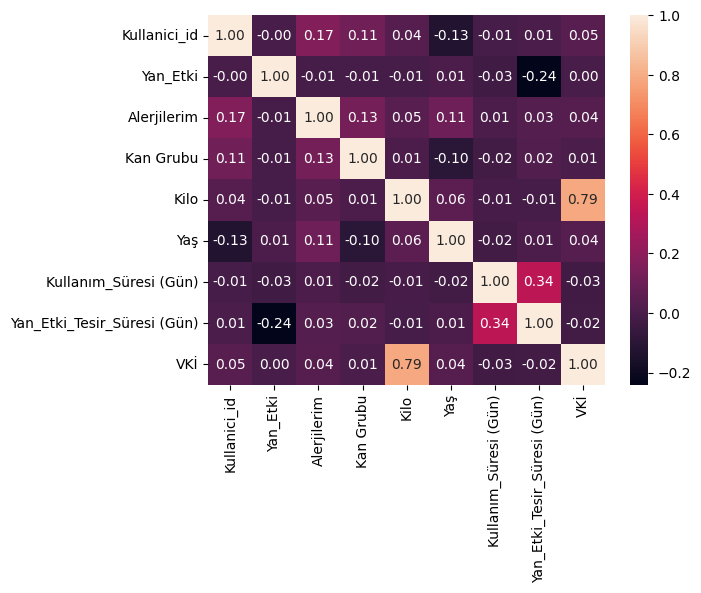

In [739]:
sns.heatmap(df[numeric_cols].corr(),annot=True,fmt='.2f')

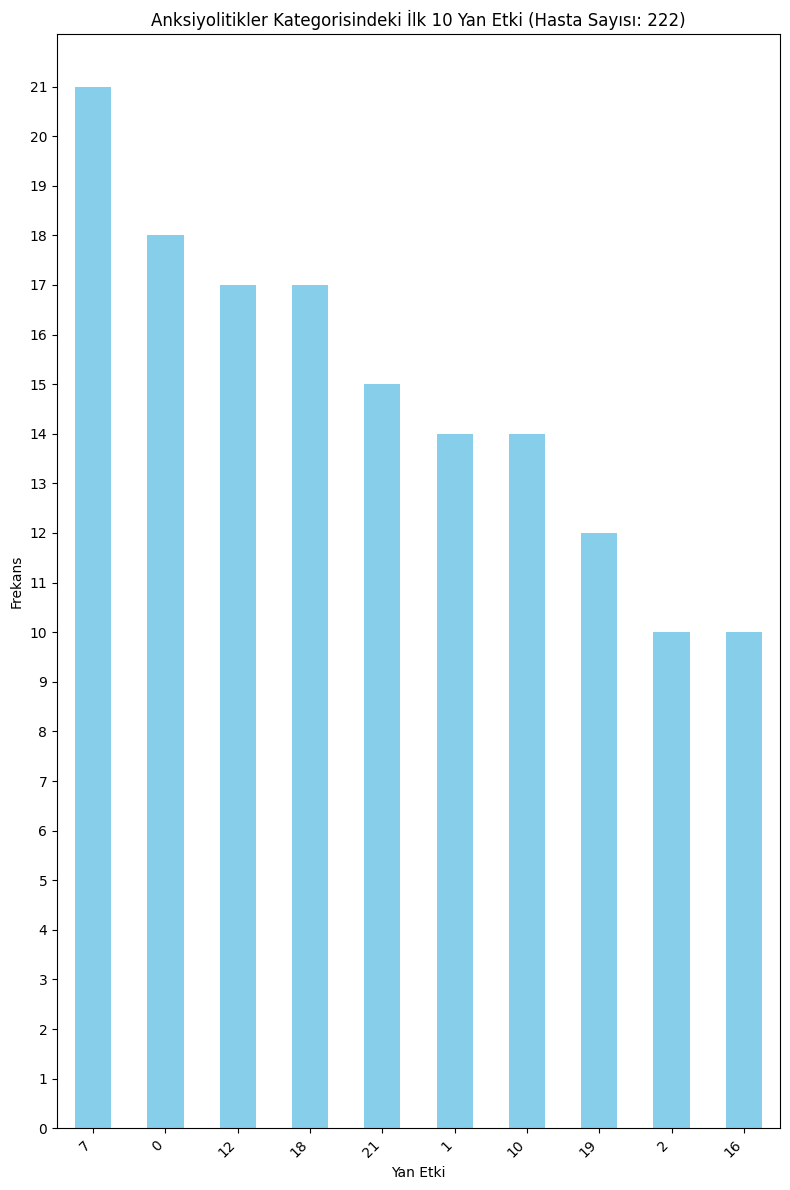

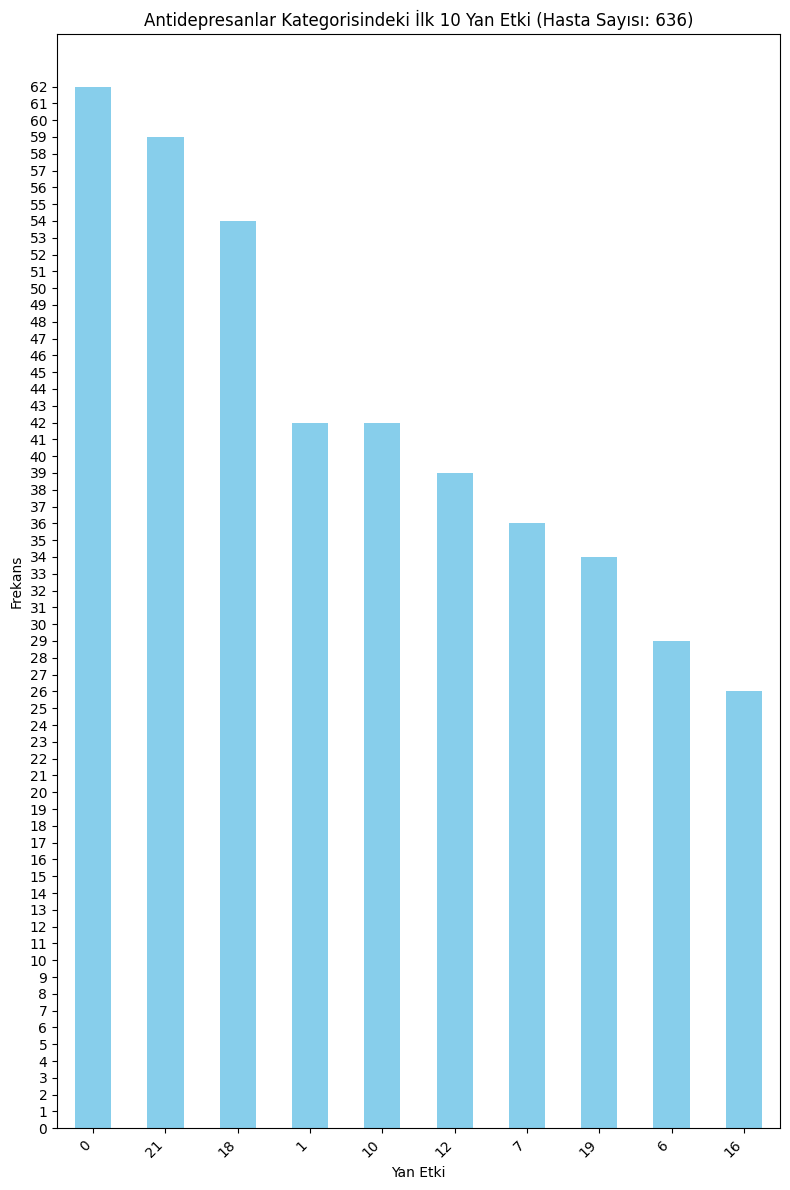

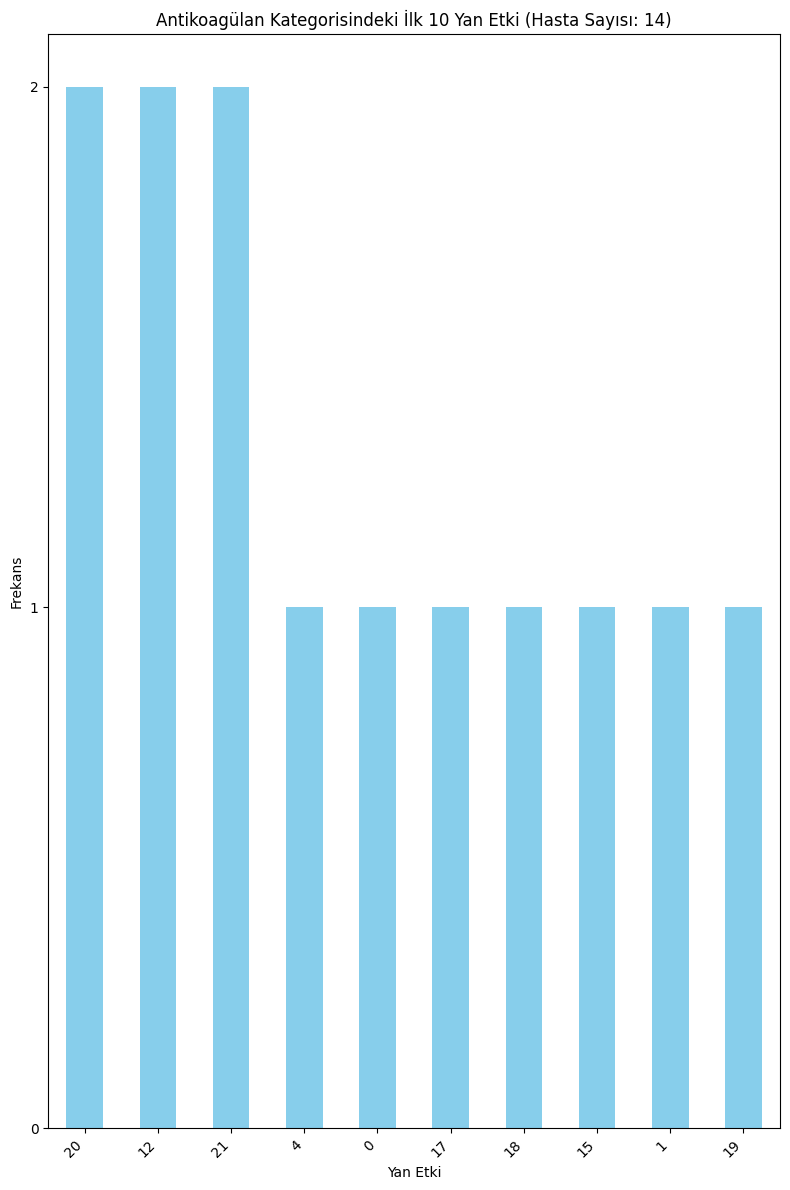

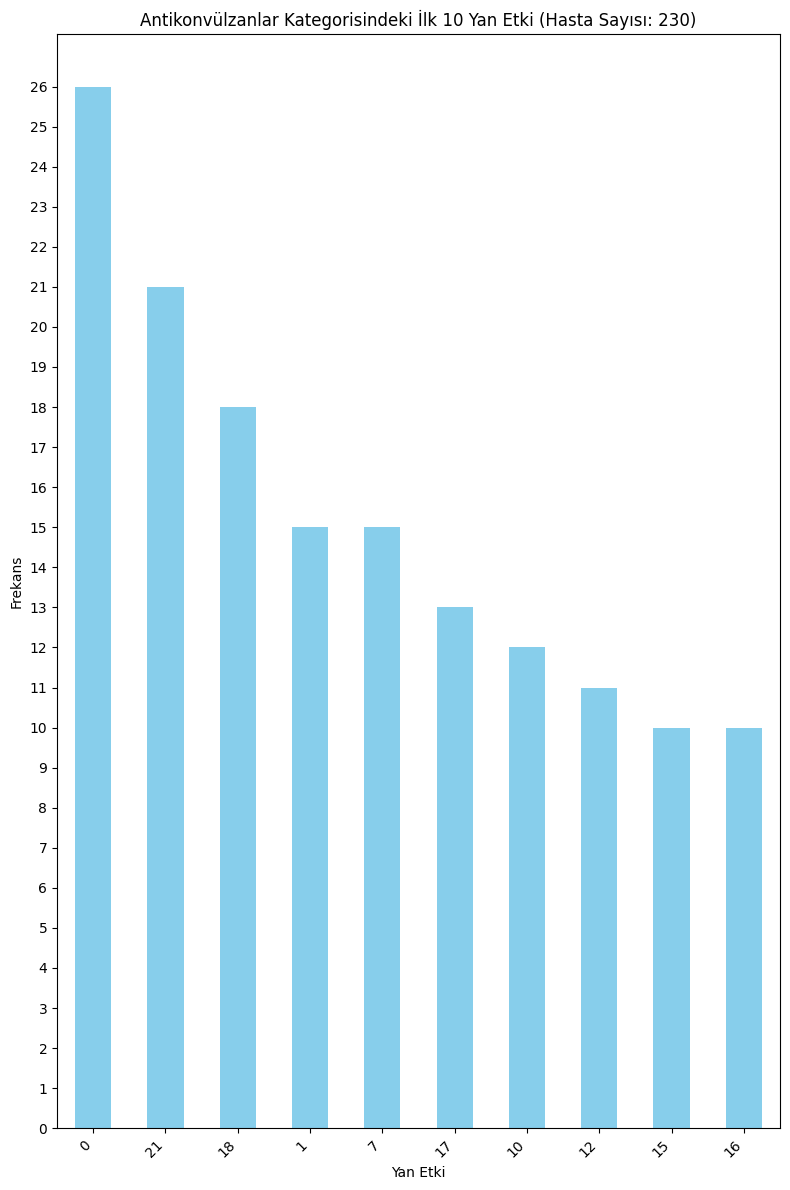

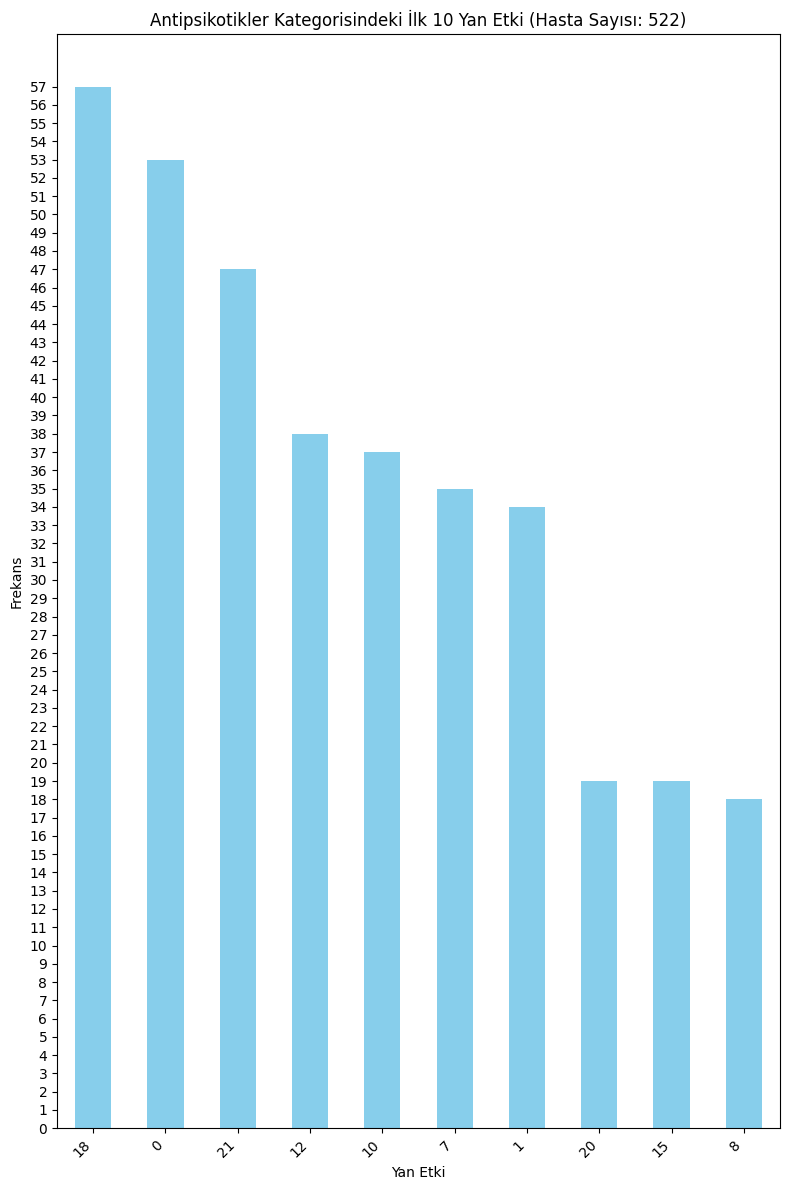

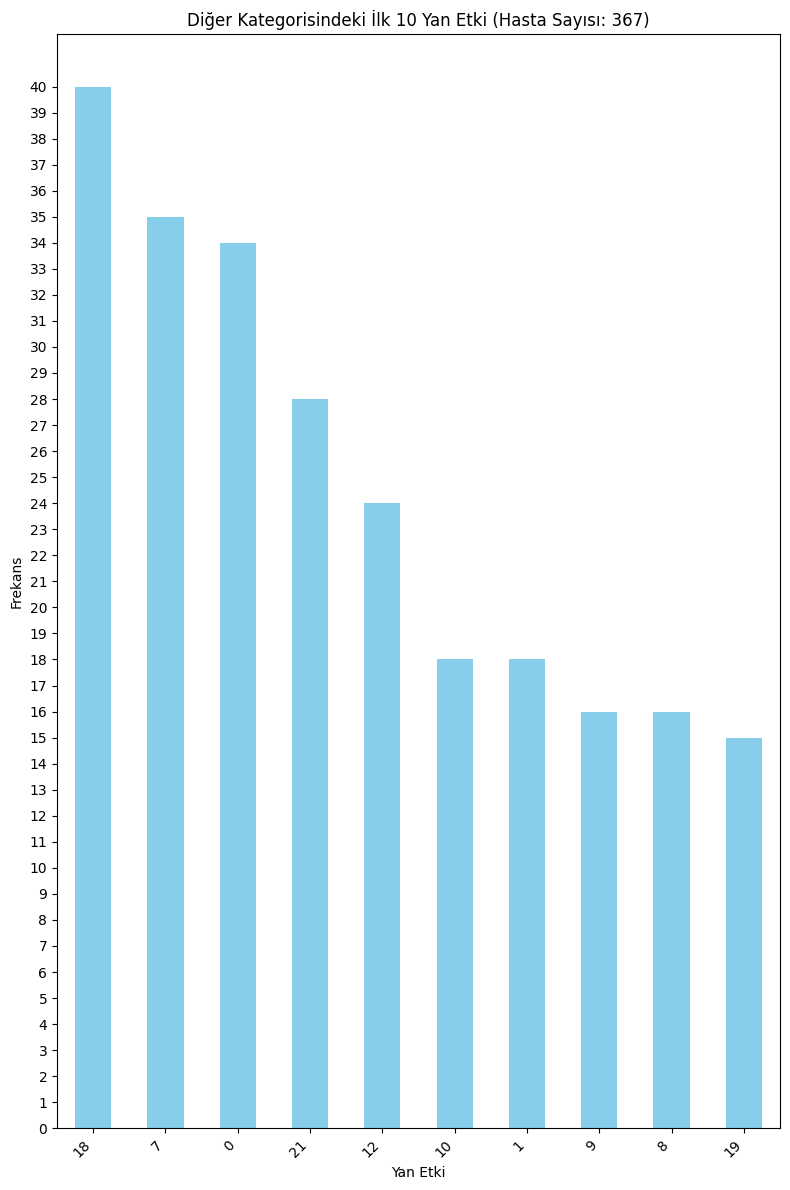

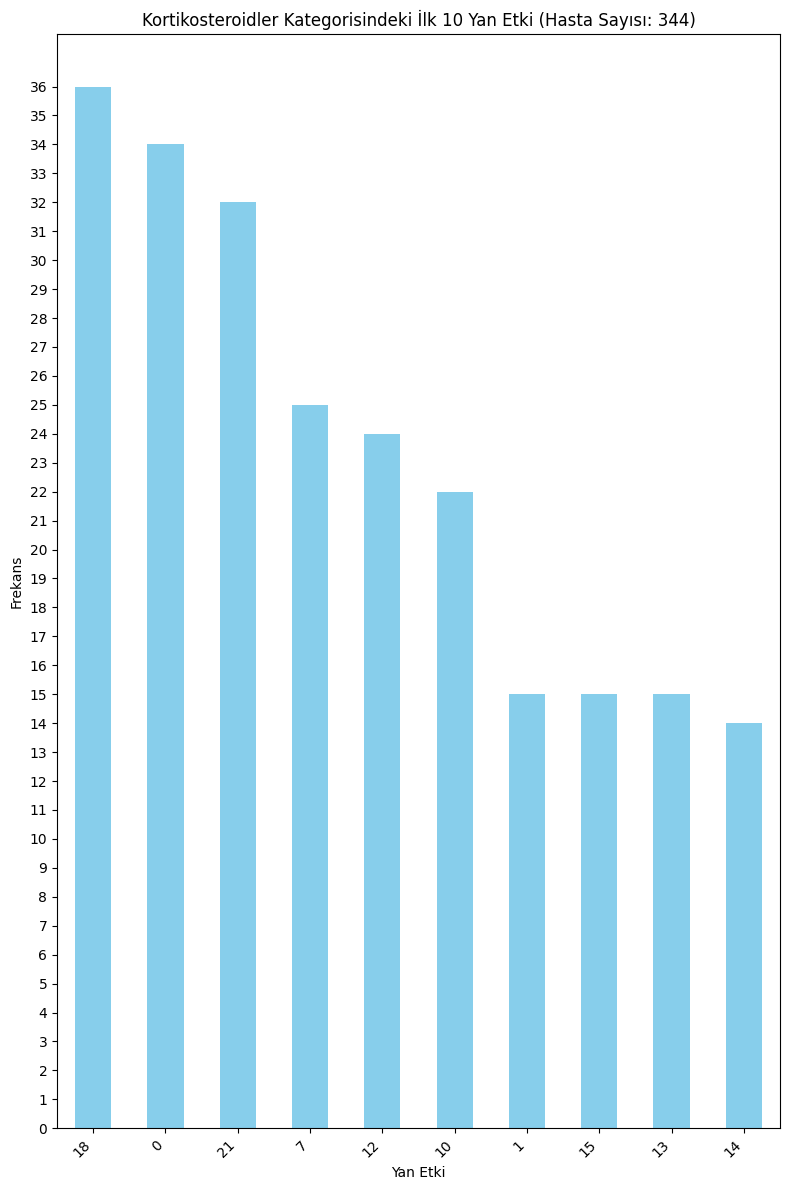

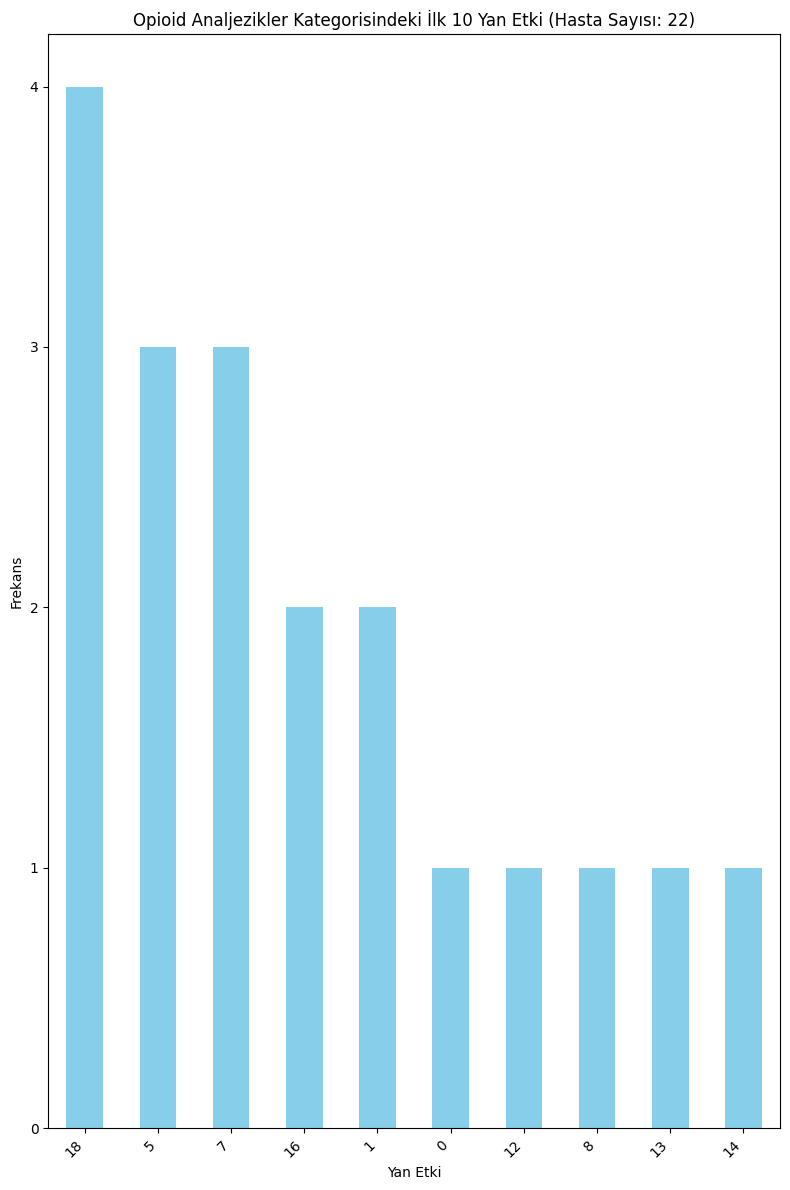

In [740]:
# Kategori gruplarını oluşturma
kategori_gruplari = df.groupby('Ilac_Kategorisi')

for kategori, grup in kategori_gruplari:
    # Hasta sayısını alma
    hasta_sayisi = grup['Standart_Ilac_Adi'].count()
    
    # Her kategorideki ilk 5 yan etkiyi alıyoruz
    yan_etki_count = grup['Yan_Etki'].value_counts().nlargest(10)
    
    # Bar grafiği oluşturma
    plt.figure(figsize=(8, 12))
    ax = yan_etki_count.plot(kind='bar', color='skyblue')
    
    # Başlıkta hasta sayısını gösterme
    plt.title(f"{kategori} Kategorisindeki İlk 10 Yan Etki (Hasta Sayısı: {hasta_sayisi})")
    plt.xlabel('Yan Etki')
    plt.ylabel('Frekans')
    plt.xticks(rotation=45, ha='right')
    
    # Y eksenini tam sayı olacak şekilde ayarlama
    ax.set_yticks(np.arange(0, yan_etki_count.max() + 1, 1))
    
    # Grafiği gösterme
    plt.tight_layout()
    plt.show()

YAN ETKİ-KİLO KATEGORİSİ GRAFİĞİ

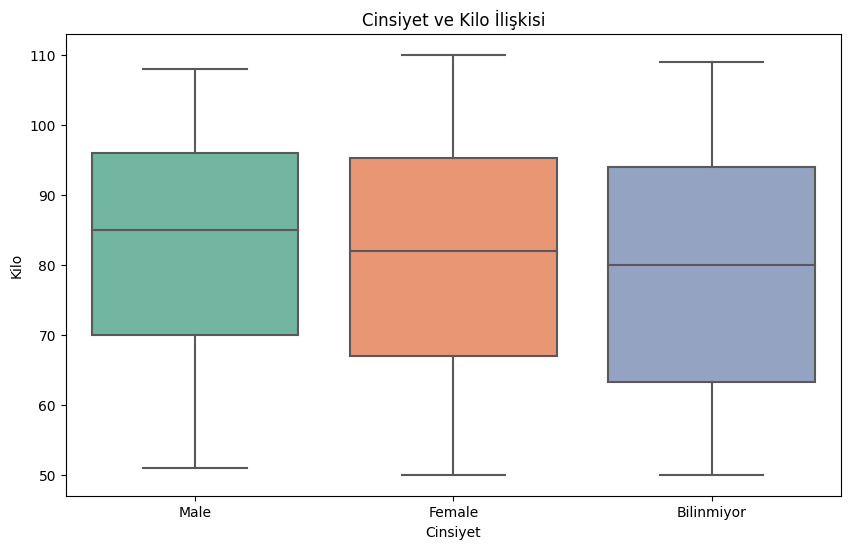

In [741]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cinsiyet', y='Kilo', data=df, palette='Set2')
plt.title('Cinsiyet ve Kilo İlişkisi')
plt.xlabel('Cinsiyet')
plt.ylabel('Kilo')
plt.show()

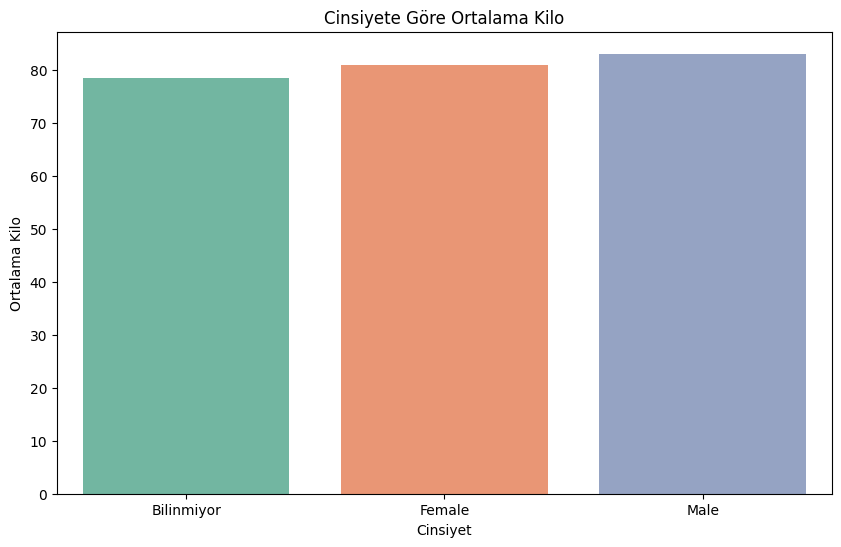

In [742]:
kilo_avg = df.groupby('Cinsiyet')['Kilo'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cinsiyet', y='Kilo', data=kilo_avg, palette='Set2')
plt.title('Cinsiyete Göre Ortalama Kilo')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Kilo')
plt.show()

In [744]:
df.head()

,Kullanici_id,Cinsiyet,Il,Kilo,Boy (m),VKİ,Kilo Kategorisi,Yaş,Yaş Kategorisi,Ilac_Adi,...,Erkek_Kardes_Kronik_HastaliklariKalpHastaliklariDiyabet,Erkek_Kardes_Kronik_HastaliklariGuatrKOAH,Erkek_Kardes_Kronik_HastaliklariHipertansiyonKanHastaliklari,Erkek_Kardes_Kronik_HastaliklariDiyabetKanser,Erkek_Kardes_Kronik_HastaliklariAlzheimerGuatr,Erkek_Kardes_Kronik_HastaliklariHipertansiyonAlzheimer,Erkek_Kardes_Kronik_HastaliklariKemikErimesiHipertansiyon,Erkek_Kardes_Kronik_HastaliklariGuatr,Erkek_Kardes_Kronik_HastaliklariDiyabetDiger,Ilaç Kategorisi
0,107,Male,5,103.0,1.91,28.233875,0,62,2,trifluoperazine,...,0,0,0,0,0,0,0,1,0,2
1,140,Male,13,81.0,1.81,24.724520,2,83,4,fluphenazine hcl,...,0,0,0,0,0,0,0,0,0,4
2,2,Female,5,93.0,1.58,37.253645,4,46,1,warfarin sodium,...,0,0,0,0,0,0,0,0,0,1
3,83,Male,0,96.2,1.65,35.335170,4,45,1,valproic acid,...,0,0,0,0,0,0,0,0,0,1
4,7,Female,8,99.0,1.72,33.464035,3,46,1,carbamazepine extended release,...,0,0,0,0,0,0,0,0,0,1
